In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb

#load in the merged dataframe
merged = pd.read_csv('merged_movie_data.csv')

merged.head()

,Title,Certificate,Director,Runtime,Studio,Year,Genre,RT Critics Score,RT Critic Reviews,RT Audience Score,RT Audience Reviews,iMDb Critics Score,iMDb Critic Reviews,iMDb Audience Score,iMDb Audience Reviews
0,The Angry Birds Movie 2,R,Thurop Van Orman,100.0,Columbia Pictures,2014.0,Animation,73.0,107.0,84.0,4023.0,60.0,167.0,64.0,35376.0
1,Dora and the Lost City of Gold,PG-13,James Bobin,102.0,Paramount Pictures,1985.0,Action,84.0,148.0,88.0,6715.0,63.0,291.0,61.0,34806.0
2,Good Boys,PG-13,Gene Stupnitsky,95.0,Universal Pictures,2003.0,Adventure,80.0,237.0,86.0,13007.0,NaN,604.0,67.0,81961.0
3,Brian Banks,PG-13,Tom Shadyac,99.0,Bleecker Street,2023.0,Biography,61.0,69.0,97.0,1831.0,58.0,60.0,72.0,9274.0
4,The Farewell,R,Lulu Wang,98.0,A24,2019.0,Comedy,98.0,322.0,87.0,2490.0,89.0,311.0,75.0,71293.0


In [2]:
#compute the average scores for Audience and Critics
merged['Audience Avg'] = merged[['RT Audience Score', 'iMDb Audience Score']].mean(axis=1)
merged['Critics Avg'] = merged[['RT Critics Score', 'iMDb Critics Score']].mean(axis=1)

#classify as 'Fresh' or 'Rotten' based on the average score
merged['Audience Classification'] = merged['Audience Avg'].apply(lambda x: 'Fresh' if x >= 60 else 'Rotten')
merged['Critics Classification'] = merged['Critics Avg'].apply(lambda x: 'Fresh' if x >= 60 else 'Rotten')

#drop the average columns
merged.drop(['Audience Avg', 'Critics Avg'], axis=1, inplace=True)

merged.head()

,Title,Certificate,Director,Runtime,Studio,Year,Genre,RT Critics Score,RT Critic Reviews,RT Audience Score,RT Audience Reviews,iMDb Critics Score,iMDb Critic Reviews,iMDb Audience Score,iMDb Audience Reviews,Audience Classification,Critics Classification
0,The Angry Birds Movie 2,R,Thurop Van Orman,100.0,Columbia Pictures,2014.0,Animation,73.0,107.0,84.0,4023.0,60.0,167.0,64.0,35376.0,Fresh,Fresh
1,Dora and the Lost City of Gold,PG-13,James Bobin,102.0,Paramount Pictures,1985.0,Action,84.0,148.0,88.0,6715.0,63.0,291.0,61.0,34806.0,Fresh,Fresh
2,Good Boys,PG-13,Gene Stupnitsky,95.0,Universal Pictures,2003.0,Adventure,80.0,237.0,86.0,13007.0,NaN,604.0,67.0,81961.0,Fresh,Fresh
3,Brian Banks,PG-13,Tom Shadyac,99.0,Bleecker Street,2023.0,Biography,61.0,69.0,97.0,1831.0,58.0,60.0,72.0,9274.0,Fresh,Rotten
4,The Farewell,R,Lulu Wang,98.0,A24,2019.0,Comedy,98.0,322.0,87.0,2490.0,89.0,311.0,75.0,71293.0,Fresh,Fresh


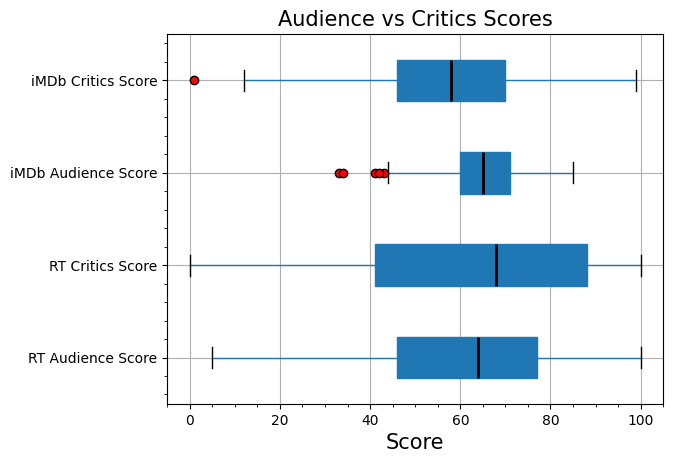

In [3]:
#boxplot for Audience and Critics Scores

#remove nan entries
merged_box = merged.dropna(subset=['RT Audience Score', 'RT Critics Score', 'iMDb Audience Score', 'iMDb Critics Score'])

#create boxplot
merged_box.boxplot(column=['RT Audience Score', 'RT Critics Score', 'iMDb Audience Score', 'iMDb Critics Score'], 
                   vert=False, patch_artist = True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                   medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('Audience vs Critics Scores', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.suptitle('')
plt.minorticks_on()
plt.show()

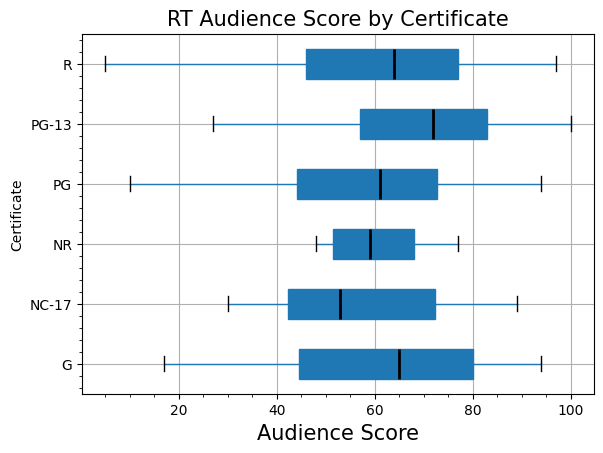

In [4]:
#boxplot for RT Audience Score by Certificate
merged_box.boxplot(column='RT Audience Score', 
                  by='Certificate', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('RT Audience Score by Certificate', fontsize=15)
plt.suptitle('') 
plt.xlabel('Audience Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

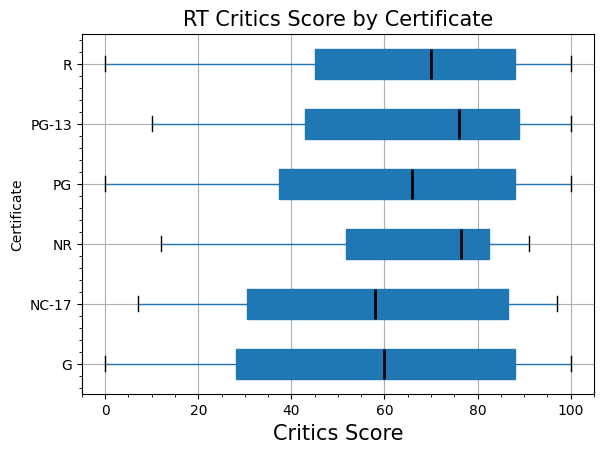

In [5]:
#boxplot for RT Critics Score by Certificate
merged_box.boxplot(column='RT Critics Score', 
                  by='Certificate', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('RT Critics Score by Certificate', fontsize=15)
plt.suptitle('')
plt.xlabel('Critics Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

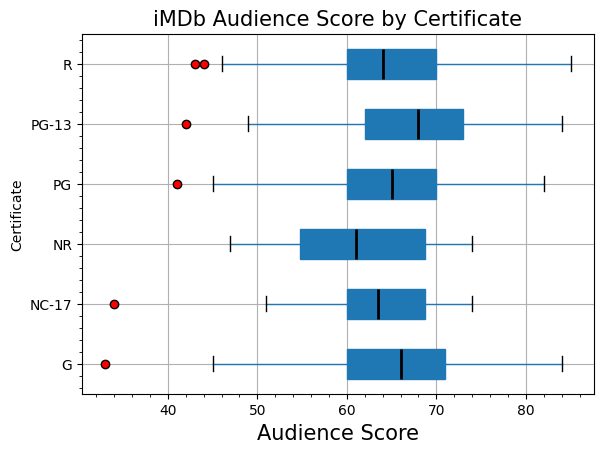

In [6]:
#boxplot for iMDb Audience Score by Certificate
merged_box.boxplot(column='iMDb Audience Score', 
                  by='Certificate', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('iMDb Audience Score by Certificate', fontsize=15)
plt.suptitle('')
plt.xlabel('Audience Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

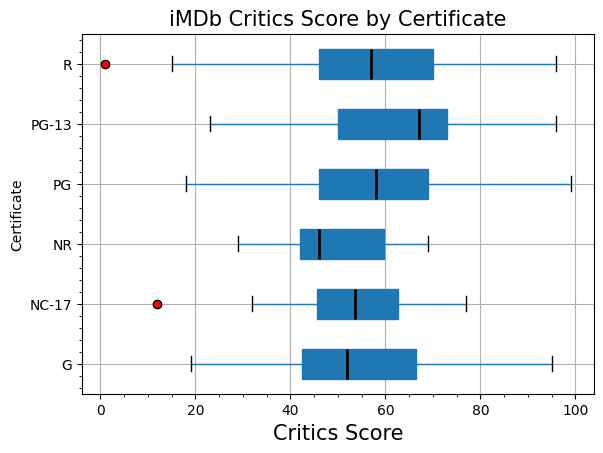

In [7]:
#boxplot for iMDb Critics Score by Certificate
merged_box.boxplot(column='iMDb Critics Score', 
                  by='Certificate', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('iMDb Critics Score by Certificate', fontsize=15)
plt.suptitle('')
plt.xlabel('Critics Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

In [8]:
#classify genres with small sample sizes as 'other'

conversion = {
    'Documentary': 'Other',
    'Thriller': 'Other',
    'Mystery': 'Other',
    'Romance': 'Other',
    'Fantasy': 'Other',
    'Adventure': 'Other'
}

merged['Genre'] = merged['Genre'].replace(conversion)

merged.head()

,Title,Certificate,Director,Runtime,Studio,Year,Genre,RT Critics Score,RT Critic Reviews,RT Audience Score,RT Audience Reviews,iMDb Critics Score,iMDb Critic Reviews,iMDb Audience Score,iMDb Audience Reviews,Audience Classification,Critics Classification
0,The Angry Birds Movie 2,R,Thurop Van Orman,100.0,Columbia Pictures,2014.0,Animation,73.0,107.0,84.0,4023.0,60.0,167.0,64.0,35376.0,Fresh,Fresh
1,Dora and the Lost City of Gold,PG-13,James Bobin,102.0,Paramount Pictures,1985.0,Action,84.0,148.0,88.0,6715.0,63.0,291.0,61.0,34806.0,Fresh,Fresh
2,Good Boys,PG-13,Gene Stupnitsky,95.0,Universal Pictures,2003.0,Other,80.0,237.0,86.0,13007.0,NaN,604.0,67.0,81961.0,Fresh,Fresh
3,Brian Banks,PG-13,Tom Shadyac,99.0,Bleecker Street,2023.0,Biography,61.0,69.0,97.0,1831.0,58.0,60.0,72.0,9274.0,Fresh,Rotten
4,The Farewell,R,Lulu Wang,98.0,A24,2019.0,Comedy,98.0,322.0,87.0,2490.0,89.0,311.0,75.0,71293.0,Fresh,Fresh


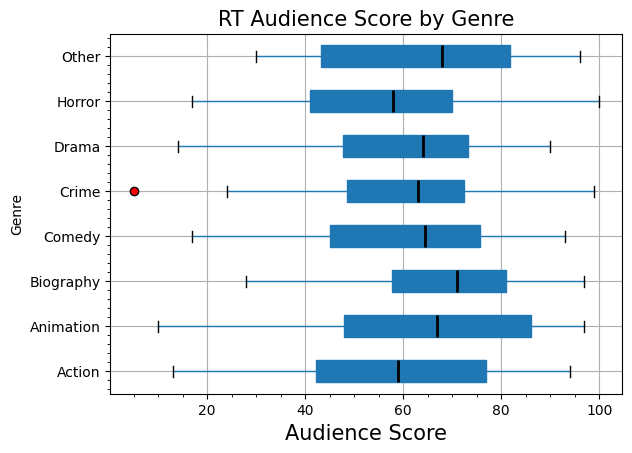

In [9]:
#boxplot for RT Audience Score by Genre

#remove nan entries
merged_box = merged.dropna(subset=['RT Audience Score', 'RT Critics Score', 'iMDb Audience Score', 'iMDb Critics Score'])

#create boxplot
merged_box.boxplot(column='RT Audience Score', 
                  by='Genre', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('RT Audience Score by Genre', fontsize=15)
plt.suptitle('')
plt.xlabel('Audience Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

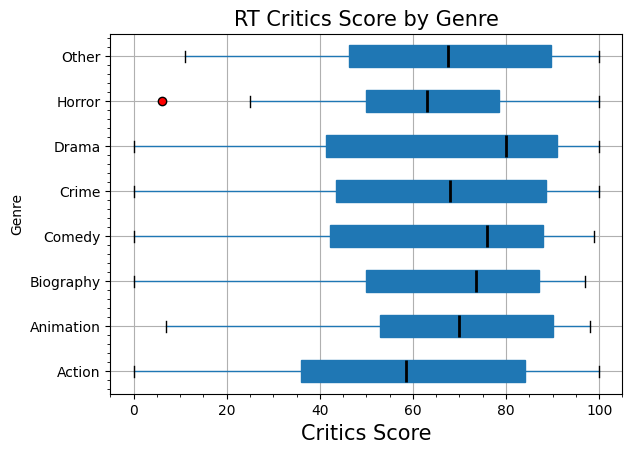

In [10]:
#boxplot for RT Critics Score by Genre
merged_box.boxplot(column='RT Critics Score', 
                  by='Genre', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('RT Critics Score by Genre', fontsize=15)
plt.suptitle('')
plt.xlabel('Critics Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

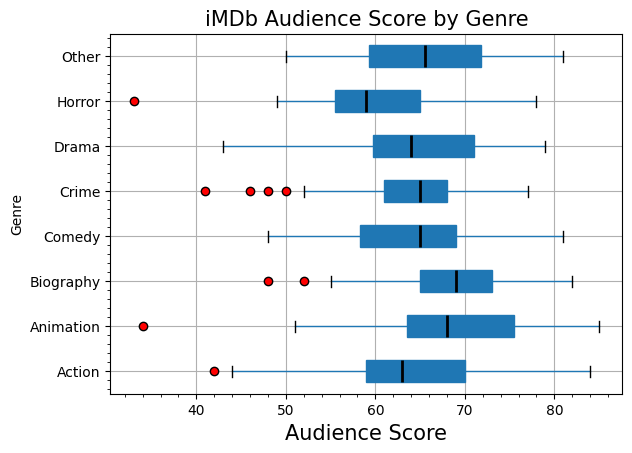

In [11]:
#boxplot for iMDb Audience Score by Genre
merged_box.boxplot(column='iMDb Audience Score', 
                  by='Genre', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('iMDb Audience Score by Genre', fontsize=15)
plt.suptitle('')
plt.xlabel('Audience Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

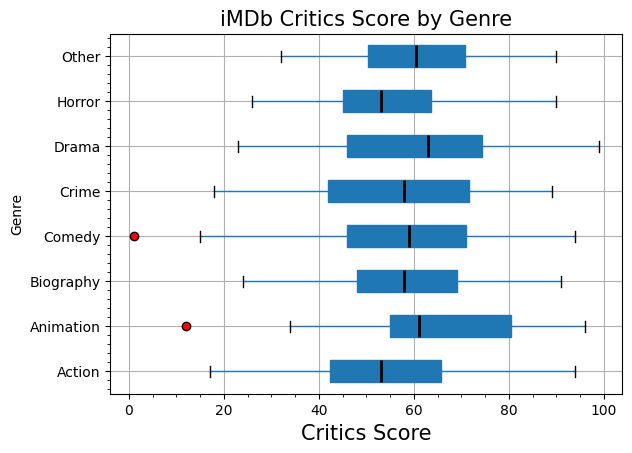

In [12]:
#boxplot for iMDb Critics Score by Genre
merged_box.boxplot(column='iMDb Critics Score', 
                  by='Genre', 
                  vert=False, 
                  patch_artist=True,
                  flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6},
                  medianprops={'color': 'black', 'linewidth': 2})

#customize the plot
plt.title('iMDb Critics Score by Genre', fontsize=15)
plt.suptitle('')
plt.xlabel('Critics Score', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.show()

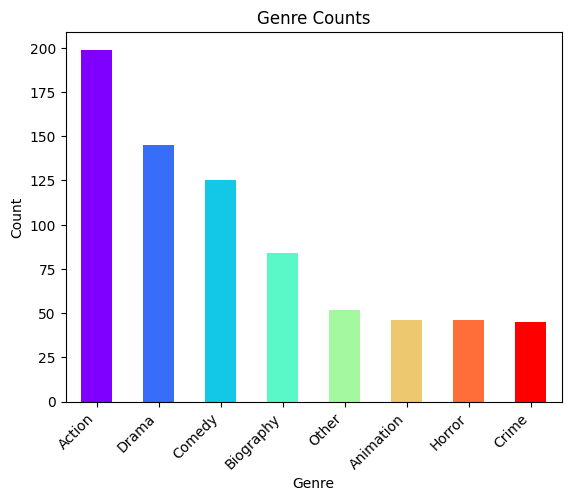

In [13]:
#bar graph to show how many of each movie genre there is

#count occurrences of each genre in the dataset
genre_counts = merged['Genre'].value_counts()

#define colors for plot
colors = plt.cm.rainbow(np.linspace(0, 1, len(genre_counts)))

genre_counts.plot(kind='bar', color = colors)
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

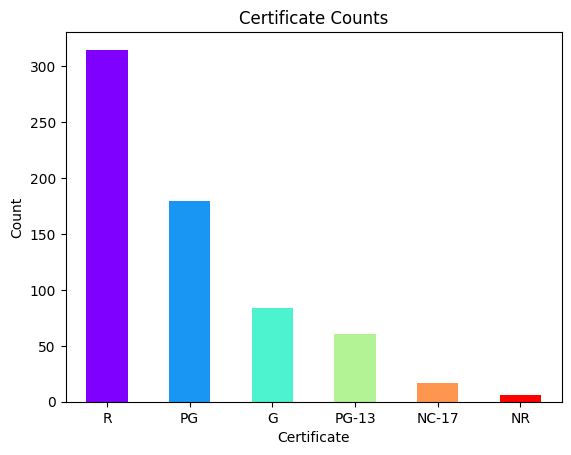

In [14]:
#bar graph to show how many of each movie certificate there is

#count occurrences of each genre in the dataset
cert_counts = merged['Certificate'].value_counts()

#define colors for plot
colors = plt.cm.rainbow(np.linspace(0, 1, len(cert_counts)))

cert_counts.plot(kind='bar', color = colors)
plt.title('Certificate Counts')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

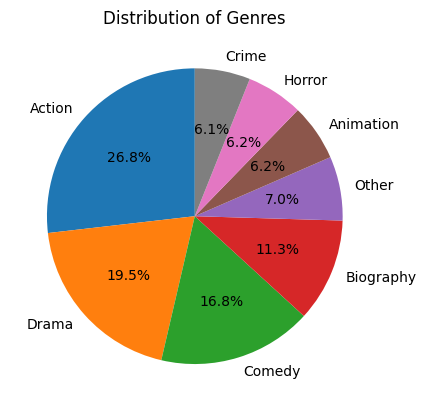

In [15]:
#pie chart to show distribution of movie genres
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres')
plt.ylabel('')
plt.show()

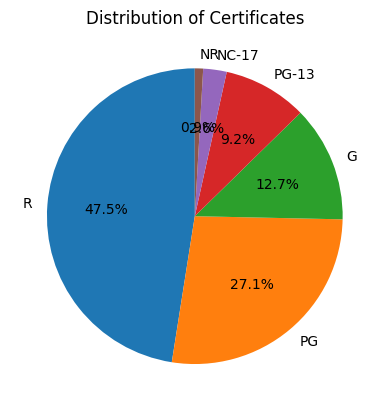

In [16]:
#pie chart to show distribution of movie certificates
cert_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Certificates')
plt.ylabel('')
plt.show()

In [17]:
#two-way table for Genre and Certificate

#remove nan entries
merged_two_way = merged.dropna(subset=['Certificate', 'Genre'])

#create two way table
pd.crosstab(merged_two_way['Certificate'], merged_two_way['Genre'])

Genre,Action,Animation,Biography,Comedy,Crime,Drama,Horror,Other
Certificate,,,,,,,,
G,21,8,7,14,6,13,9,6
NC-17,6,2,1,1,2,4,1,0
NR,4,0,0,1,0,1,0,0
PG,45,8,21,33,11,40,9,13
PG-13,12,4,7,10,6,10,5,7
R,88,20,42,52,14,58,21,20


In [18]:
#two-way table for Genre and Audience Classification

#remove nan entries
merged_two_way = merged.dropna(subset=['Audience Classification', 'Genre'])

#create two way table
pd.crosstab(merged_two_way['Audience Classification'], merged_two_way['Genre'], normalize = 'columns').round(2)

Genre,Action,Animation,Biography,Comedy,Crime,Drama,Horror,Other
Audience Classification,,,,,,,,
Fresh,0.51,0.59,0.8,0.53,0.62,0.58,0.48,0.62
Rotten,0.49,0.41,0.2,0.47,0.38,0.42,0.52,0.38


In [19]:
#two-way table for Genre and Critics Classification

#remove nan entries
merged_two_way = merged.dropna(subset=['Critics Classification', 'Genre'])

#create two way table
pd.crosstab(merged_two_way['Critics Classification'], merged_two_way['Genre'], normalize = 'columns').round(2)

Genre,Action,Animation,Biography,Comedy,Crime,Drama,Horror,Other
Critics Classification,,,,,,,,
Fresh,0.44,0.59,0.58,0.51,0.53,0.59,0.46,0.58
Rotten,0.56,0.41,0.42,0.49,0.47,0.41,0.54,0.42


In [20]:
#two-way table for Certificate and Audience Classification

#remove nan entries
merged_two_way = merged.dropna(subset=['Audience Classification', 'Certificate'])

#create two way table
pd.crosstab(merged_two_way['Audience Classification'], merged_two_way['Certificate'], normalize = 'columns').round(2)

Certificate,G,NC-17,NR,PG,PG-13,R
Audience Classification,,,,,,
Fresh,0.6,0.47,0.33,0.54,0.75,0.57
Rotten,0.4,0.53,0.67,0.46,0.25,0.43


In [21]:
#two-way table for Genre and Critics Classification

#remove nan entries
merged_two_way = merged.dropna(subset=['Critics Classification', 'Certificate'])

#create two way table
pd.crosstab(merged_two_way['Critics Classification'], merged_two_way['Certificate'], normalize = 'columns').round(2)

Certificate,G,NC-17,NR,PG,PG-13,R
Critics Classification,,,,,,
Fresh,0.46,0.47,0.67,0.52,0.59,0.53
Rotten,0.54,0.53,0.33,0.48,0.41,0.47


In [190]:
#show descriptive stats for the RT Audience and Critics Scores
merged[['RT Audience Score', 'RT Critics Score', 'iMDb Audience Score', 'iMDb Critics Score']].describe().round(2)

,RT Audience Score,RT Critics Score,iMDb Audience Score,iMDb Critics Score
count,742.00,742.00,738.00,683.00
mean,60.60,62.15,64.23,57.86
std,20.00,28.03,8.67,17.06
min,5.00,0.00,31.00,1.00
25%,45.25,39.25,59.00,46.00
50%,63.00,67.00,64.00,58.00
75%,77.00,88.00,70.75,70.00
max,100.00,100.00,85.00,99.00


In [191]:
merged.head()

,Title,Certificate,Director,Runtime,Studio,Year,Genre,RT Critics Score,RT Critic Reviews,RT Audience Score,RT Audience Reviews,iMDb Critics Score,iMDb Critic Reviews,iMDb Audience Score,iMDb Audience Reviews,Audience Classification,Critics Classification
0,The Angry Birds Movie 2,R,Thurop Van Orman,100.0,Columbia Pictures,2014.0,Animation,73.0,107.0,84.0,4023.0,60.0,167.0,64.0,35376.0,Fresh,Fresh
1,Dora and the Lost City of Gold,PG-13,James Bobin,102.0,Paramount Pictures,1985.0,Action,84.0,148.0,88.0,6715.0,63.0,291.0,61.0,34806.0,Fresh,Fresh
2,Good Boys,PG-13,Gene Stupnitsky,95.0,Universal Pictures,2003.0,Other,80.0,237.0,86.0,13007.0,NaN,604.0,67.0,81961.0,Fresh,Fresh
3,Brian Banks,PG-13,Tom Shadyac,99.0,Bleecker Street,2023.0,Biography,61.0,69.0,97.0,1831.0,58.0,60.0,72.0,9274.0,Fresh,Rotten
4,The Farewell,R,Lulu Wang,98.0,A24,2019.0,Comedy,98.0,322.0,87.0,2490.0,89.0,311.0,75.0,71293.0,Fresh,Fresh


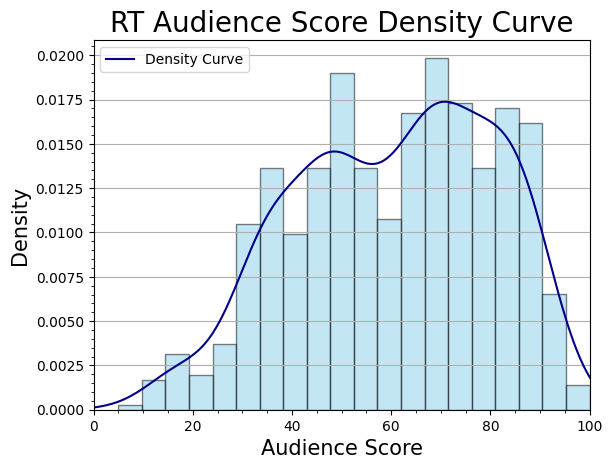

In [227]:
#histogram of RT Audience Score
plt.hist(merged['RT Audience Score'].dropna(), bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sb.kdeplot(merged['RT Audience Score'].dropna(), color='darkblue', label='Density Curve')

#customize plot for
plt.title('RT Audience Score Density Curve', fontsize=20)
plt.xlabel('Audience Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.legend()
plt.show()

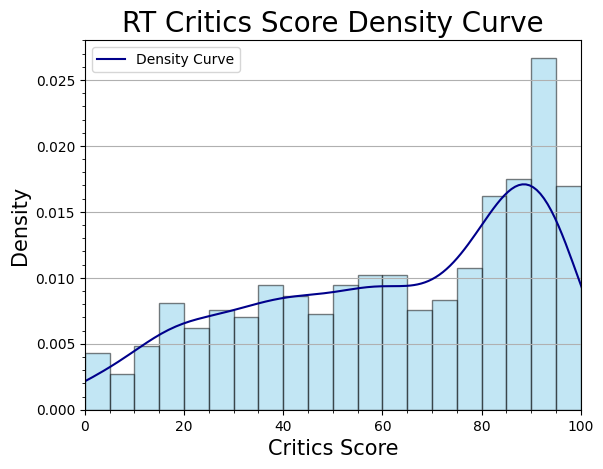

In [228]:
#histogram of RT Critics Score
plt.hist(merged['RT Critics Score'].dropna(), bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sb.kdeplot(merged['RT Critics Score'].dropna(), color='darkblue', label='Density Curve')

#customize plot
plt.title('RT Critics Score Density Curve', fontsize=20)
plt.xlabel('Critics Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.legend()
plt.show()

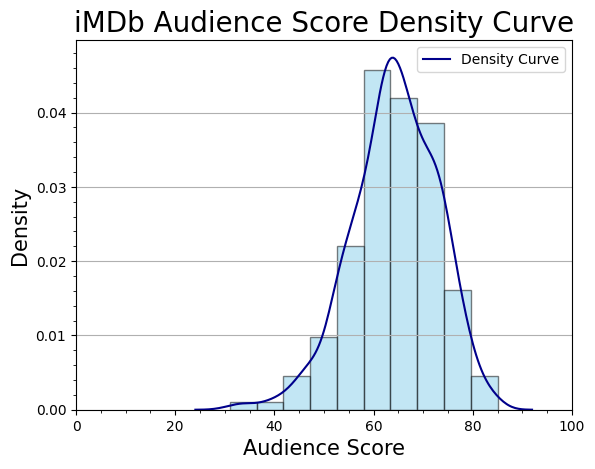

In [229]:
#histogram of iMDb Audience Score
plt.hist(merged['iMDb Audience Score'].dropna(), bins=10, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sb.kdeplot(merged['iMDb Audience Score'].dropna(), color='darkblue', label='Density Curve')

#customize plot
plt.title('iMDb Audience Score Density Curve', fontsize=20)
plt.xlabel('Audience Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.legend()
plt.show()

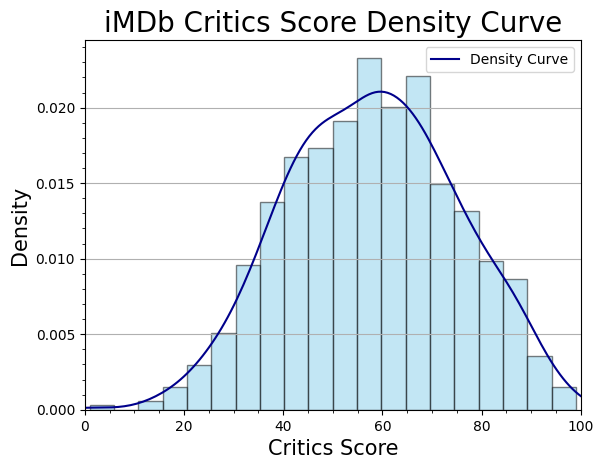

In [230]:
#histogram of iMDb Critics Score
plt.hist(merged['iMDb Critics Score'].dropna(), bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sb.kdeplot(merged['iMDb Critics Score'].dropna(), color='darkblue', label='Density Curve')

#customize plot
plt.title('iMDb Critics Score Density Curve', fontsize=20)
plt.xlabel('Critics Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True, axis='y')
plt.minorticks_on()
plt.legend()
plt.show()

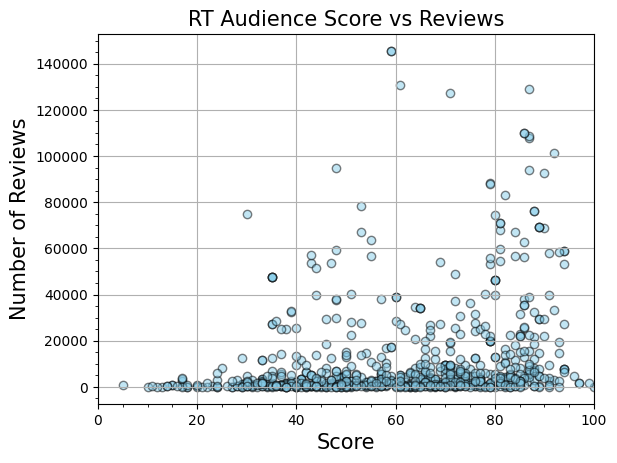

In [231]:
#scatter plot: RT Audience Score vs Reviews

#remove nan entries
merged_scatter = merged.dropna(subset=['RT Audience Score', 'RT Audience Reviews'])

#create the scatter plot
plt.scatter(merged_scatter['RT Audience Score'], merged_scatter['RT Audience Reviews'], 
            alpha=0.5, color='skyblue', edgecolor='black')

#customize plot
plt.title('RT Audience Score vs Reviews', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.minorticks_on()
plt.show()


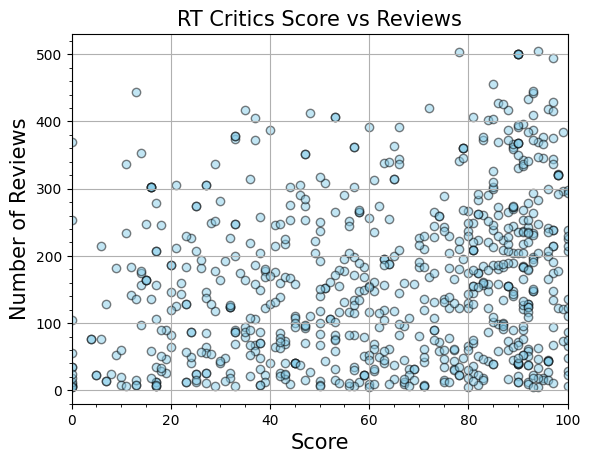

In [232]:
#scatter plot: RT Critics Score vs Reviews

#remove nan entries
merged_scatter = merged.dropna(subset=['RT Critics Score', 'RT Critic Reviews'])

#create the scatter plot
plt.scatter(merged_scatter['RT Critics Score'], merged_scatter['RT Critic Reviews'], 
            alpha=0.5, color='skyblue', edgecolor='black')

#customize plot
plt.title('RT Critics Score vs Reviews', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.minorticks_on()
plt.show()

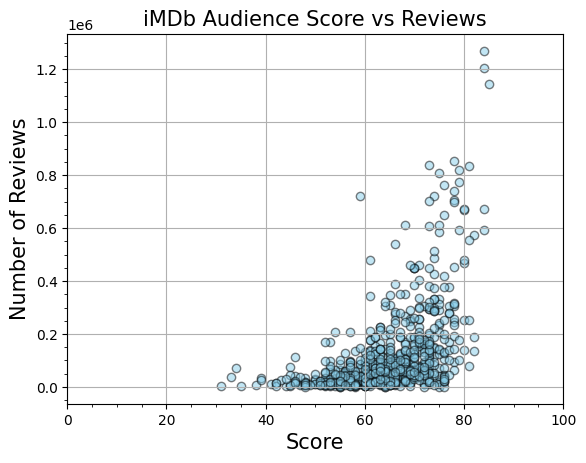

In [233]:
#scatter plot: iMDb Audience Score vs Reviews

#remove nan entries
merged_scatter = merged.dropna(subset=['iMDb Audience Score', 'iMDb Audience Reviews'])

#create the scatter plot
plt.scatter(merged_scatter['iMDb Audience Score'], merged_scatter['iMDb Audience Reviews'], 
            alpha=0.5, color='skyblue', edgecolor='black')

#customize plot
plt.title('iMDb Audience Score vs Reviews', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.minorticks_on()
plt.show()

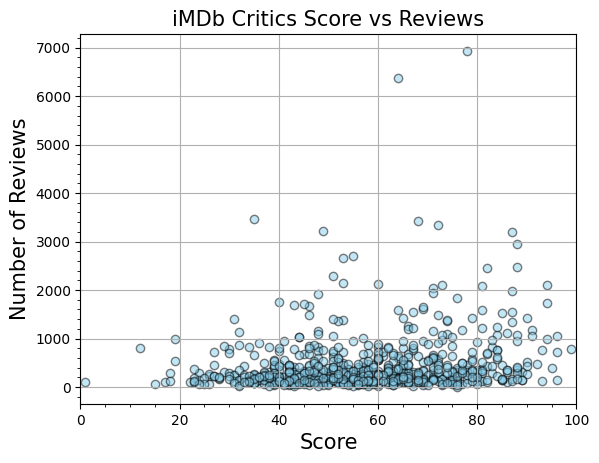

In [234]:
#scatter plot: iMDb Critics Score vs Reviews

#remove nan entries
merged_scatter = merged.dropna(subset=['iMDb Critics Score', 'iMDb Critic Reviews'])

#create the scatter plot
plt.scatter(merged_scatter['iMDb Critics Score'], merged_scatter['iMDb Critic Reviews'], 
            alpha=0.5, color='skyblue', edgecolor='black')

#customize plot
plt.title('iMDb Critics Score vs Reviews', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlim(0,100)
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.minorticks_on()
plt.show()